In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="pastel")
plt.style.use('bmh')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Verdana']

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


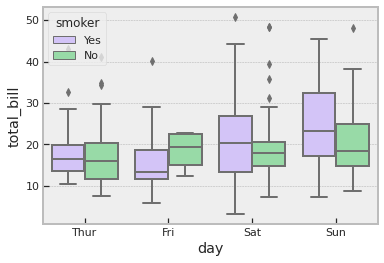

In [2]:
# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", 
            palette=["m", "g"],
#             palette=['#ffa31a', '#1b1b1b'],
#             saturation=.6,
            data=tips)
# sns.despine(offset=5, trim=True)

plt.savefig('test.pdf')

In [13]:

def plot_times(dn, num_idx):
    dfs = []
    for dg in [1000, 10000]:
        runs = []
        ts = []
        t = 0
        r = 0
        for index in range(2, num_idx+1):
            with open('../logs/dim10/syn_{}_rvi/log_{}.txt'
                      .format(dg, index)) as f:
                for num, line in enumerate(f):
                    if num == 2:
                        tmps = line.strip().split(' ')
                        r = int(tmps[2])
                    elif num == 4:
                        tmps = line.strip().split(' ')
                        t = float(tmps[2])

                runs.append(r)
                ts.append(t)
        mthds = ['RVI'] * len(ts)
        sizes = [dg] * len(ts)

        df1 = pd.DataFrame({
            'runs': runs,
            'time': ts,
            'method': mthds,
            'size': sizes
        })
        print(df1.describe())
        dfs.append(df1)
        
        
        try:
            runs = []
            ts = []
            for index in range(2, num_idx+1):
                with open('../logs/dim10/syn_{}_srvi/log_{}.txt'
                          .format(dg, index)) as f:
                    for num, line in enumerate(f):
                        if num == 2:
                            tmps = line.strip().split(' ')
                            r = int(tmps[2])
                        elif num == 4:
                            tmps = line.strip().split(' ')
                            t = float(tmps[2])

                    runs.append(r)
                    ts.append(t)
            mthds = ['SRVI'] * len(ts)
            sizes = [dg] * len(ts)

            df2 = pd.DataFrame({
                'runs': runs,
                'time': ts,
                'method': mthds,
                'size': sizes
            })
            print(df2.describe())
            dfs.append(df2)
        except:
            pass
        
    df = pd.concat(dfs, ignore_index=True)
    
    sns.boxplot(x="size", y="time",
                hue="method", 
                palette=["m", "g"],
                saturation=7,
                data=df)
    plt.ylim(0,)
    
    

#     sns.despine(offset=5, trim=True)

            runs       time    size
count  30.000000  30.000000    30.0
mean   14.700000  11.828446  1000.0
std    12.652245   6.198065     0.0
min     7.000000   0.494723  1000.0
25%     9.000000   9.036929  1000.0
50%    11.500000  10.454691  1000.0
75%    16.000000  12.224717  1000.0
max    78.000000  29.287539  1000.0
              runs        time    size
count    30.000000   30.000000    30.0
mean    440.600000   38.089203  1000.0
std     405.857424   23.671412     0.0
min      54.000000    6.177725  1000.0
25%     183.000000   23.660568  1000.0
50%     363.500000   32.715956  1000.0
75%     539.500000   43.985834  1000.0
max    2028.000000  110.667018  1000.0
             runs         time     size
count   30.000000    30.000000     30.0
mean    39.166667   513.737809  10000.0
std     32.400600   451.968303      0.0
min      8.000000    34.144744  10000.0
25%     13.250000   190.641346  10000.0
50%     34.000000   412.308428  10000.0
75%     45.750000   644.165948  10000.0
max  

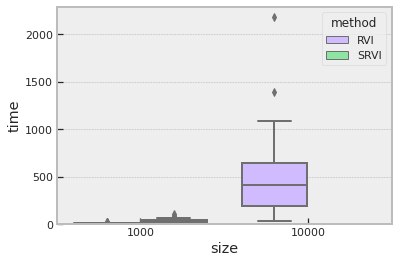

In [14]:
plot_times("syn_1000", 31)


            runs       time    size
count  29.000000  29.000000    29.0
mean   16.551724  13.376381  1000.0
std    13.372643   7.512454     0.0
min     8.000000   1.072361  1000.0
25%    10.000000   9.532220  1000.0
50%    13.000000  11.197234  1000.0
75%    18.000000  14.713948  1000.0
max    79.000000  38.849690  1000.0
              runs        time    size
count    29.000000   29.000000    29.0
mean    453.827586   38.596003  1000.0
std     406.406910   23.924196     0.0
min      54.000000    6.177725  1000.0
25%     186.000000   24.466301  1000.0
50%     392.000000   32.945390  1000.0
75%     566.000000   44.134356  1000.0
max    2028.000000  110.667018  1000.0


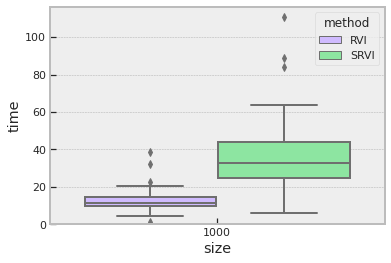

In [4]:
plot_times("syn_1000", 31, 1000)
